In [1]:
import sys ,os 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(font_scale=1.5,style='whitegrid',context="paper")
from math import pi


In [2]:
## source code ##
## https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
def plot_radar(dataframe,title,list_of_colors,linestyle_list):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks([0,0.2,0.4,0.6,0.8,1.0], ["0","0.2","0.4","0.6","0.8","1.0"], color="grey", size=10)
    plt.ylim(0,1)
      # plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0.4","0.5","0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
      # plt.ylim(0.4,1)


      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

      #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)
          # ax.fill(angles, values,i , alpha=0.1)



      # Add legend
    plt.legend( bbox_to_anchor=(0, 1))

#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
#     plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout()
    #   plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
    plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")

    #   plt.savefig(f"../figures/{title}.svg",format="svg")

In [3]:
df_metrics_unbalanced =pd.read_csv('../data/dataframe_metrics_shakel_unbalanced.csv')
df_metrics_unbalanced.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

df_metrics_balanced =pd.read_csv('../data/dataframe_metrics_shakel_balanced.csv')
df_metrics_balanced.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']


In [4]:
df_CV_10k = pd.read_csv("../data/dataframe_metrics_shakel_metrics_crossvalidation.csv")
df_CV_10k = df_CV_10k[['BM5 bal  ',' 10kCV Bal ',' BM5 unb ','10kCV Unb ']]
df_CV_10k.columns = ['Bal  BM4/5-up','Bal 10CV','3K BM4/5-up','3K-10CV']
df_CV_10k["Metrics"] = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']
df_CV_10k = df_CV_10k.set_index("Metrics")

In [5]:
df_metrics_unbalanced

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
PRC,0.868326,0.872566,0.795650,0.986521,0.267004,0.926051,0.399832,0.411593
SVM,0.708476,0.707225,0.729924,0.978206,0.126983,0.820932,0.216331,0.214437


In [6]:
df_CV_10k

,Bal BM4/5-up,Bal 10CV,3K BM4/5-up,3K-10CV
Metrics,,,,
Acc,0.8320,0.9446,0.9677,0.9619
R_inc,0.8668,0.9645,0.9683,0.9633
R_corr,0.7972,0.9248,0.9554,0.9387
P_inc,0.8104,0.9288,0.9973,0.9963
P_corr,0.8569,0.9627,0.6380,0.6006
F1_inc,0.8377,0.9461,0.9826,0.9795
F1_corr,0.8260,0.9430,0.7651,0.7319
MCC,0.6658,0.8904,0.7661,0.7335


b RF 
gold PRC 
g SVM 


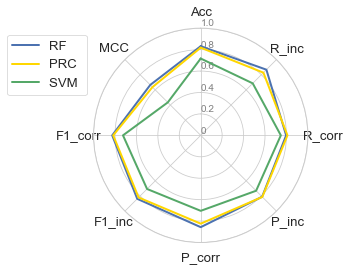

In [7]:
plot_radar(df_metrics_balanced,"Radar_plot_metrics_balanced",['b','gold','g'],['solid','solid','solid'])

Navy RF 
goldenrod PRC 
darkgreen SVM 


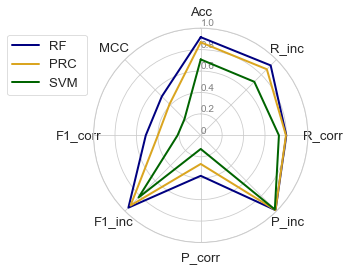

In [8]:
plot_radar(df_metrics_unbalanced,"Radar_plot_metrics_unbalanced",['Navy','goldenrod','darkgreen'],['solid','solid','solid'])

b Bal  BM4/5-up
indianred Bal 10CV
Navy 3K BM4/5-up
darkorange 3K-10CV


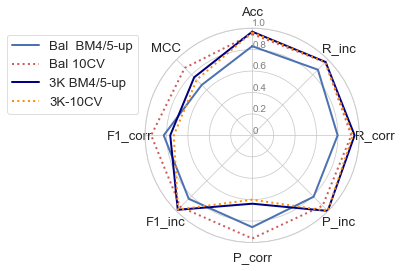

In [9]:
plot_radar(df_CV_10k.T,"CV_performance",['b','indianred','Navy','darkorange'],['solid','dotted','solid','dotted'])

In [10]:
df_hard = pd.read_csv("../data/dataframe_metrics_hard_performance.csv")
df_hard.set_index("Metrics",inplace=True)

In [11]:
df_hard = df_hard.T

In [12]:
df_hard.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

In [13]:
df_fig_10 = pd.read_csv("../data/dataframe_metrics_CODES_performance_final.csv")

In [14]:
df_fig_10.columns = ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']

Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up
black CoDES_Score_set


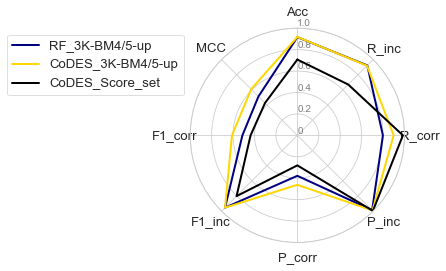

In [15]:
plot_radar(df_fig_10,"figure_10",['Navy','gold','black'],['solid','solid','solid'])

darkgrey bal-hard-10CV_bal-hard
magenta bal-hard-10CV_3K-hard


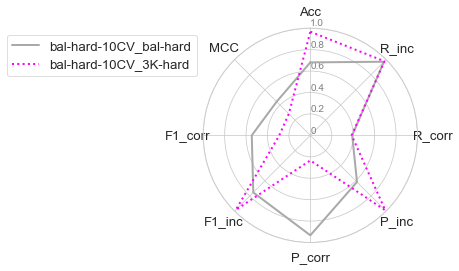

In [16]:
plot_radar(df_hard,"hard_set",['darkgrey','magenta'],['solid','dotted'])

In [17]:
df_hard

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
bal-hard-10CV_bal-hard,0.681067,0.971610,0.390523,0.615782,0.932768,0.753392,0.546630,0.444624
bal-hard-10CV_3K-hard,0.967795,0.977836,0.385701,0.989274,0.233920,0.983517,0.289714,0.284112


In [18]:
df_hard.T.columns

Index(['bal-hard-10CV_bal-hard', 'bal-hard-10CV_3K-hard'], dtype='object')

In [19]:
df_ss = pd.read_csv("../data/dataframe_metrics_Score_set_by_target.csv")


In [20]:
# df_ss.columns  = ['Target','Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']
df_ss.columns

Index(['Target', 'Acc', 'R_inc', 'R_corr', 'P_inc', 'P_corr', 'F1_inc',
       'F1_corr', 'MCC'],
      dtype='object')

In [21]:
df_ss.set_index("Target",inplace=True)

<AxesSubplot:xlabel='Target'>

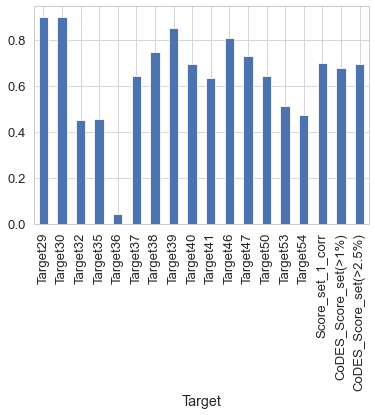

In [22]:
df_ss["Acc"].T.plot(kind="bar")

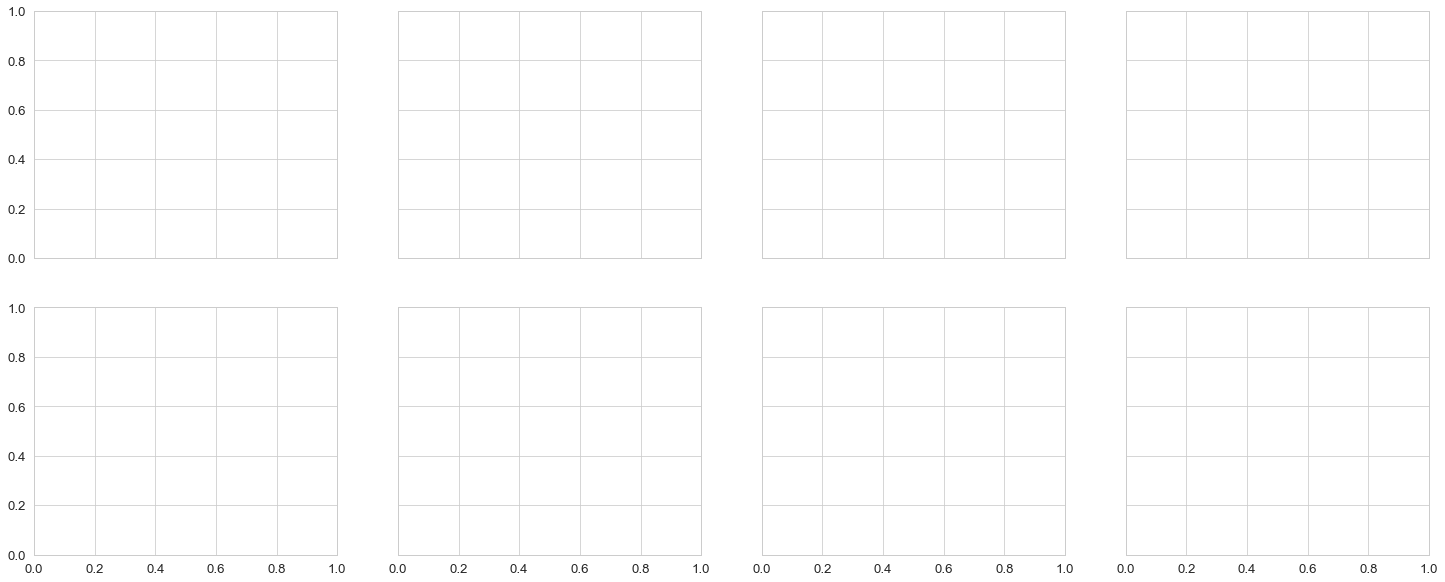

In [23]:
fig , axs = plt.subplots(nrows=2 , ncols=4 ,sharex=True,sharey=True, figsize=(25,10))

In [24]:
for z in ['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC']:
    print (z)
for m in range(2):
    for n in range(4):
        print (m,n)




my_dict = {'Acc' : (0 , 0),
'R_inc' : (0 ,1 ),
'R_corr' :( 0 ,2),
'P_inc' : (0 ,3 ),
'P_corr' : (1 ,0 ),
'F1_inc' :(1 ,1 ),
'F1_corr' :( 1, 2),
'MCC' : (1  ,3)}

Acc
R_inc
R_corr
P_inc
P_corr
F1_inc
F1_corr
MCC
0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


In [25]:
for z,c in zip(['Acc', 'R_inc', 'R_corr', 'P_inc','P_corr', 'F1_inc', 'F1_corr', 'MCC'], 
               ['r','b', 'g', 'pink','gold' ,'silver' , 'Navy','black']):
    print ( my_dict[z][0], my_dict[z][1])
    df_ss[z].T.plot(kind="bar",ax=axs[my_dict[z][0]][my_dict[z][1]], title=z , color=c)


#             df_ss[z].T.plot(kind="bar")
            

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


In [26]:
fig.savefig(f"figures/CoDes_Score_set_by_target.png",dpi=300,transparent=True,format="png")
# plt.tight_layout()
# plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
# plt.savefig(f"figures/CoDes_Score_set_by_target.png",dpi=300,transparent=True,format="png")

In [27]:
# plot_radar(df_fig_10,"figure_10",['Navy','gold','black'],['solid','solid','solid'])

In [28]:
df_CODES_in_scoreset = pd.concat([df_fig_10.loc["CoDES_Score_set"],df_ss.loc["Score_set_1_corr"]],axis=1 )

Cyan CoDES_Score_set
DarkCyan Score_set_1_corr


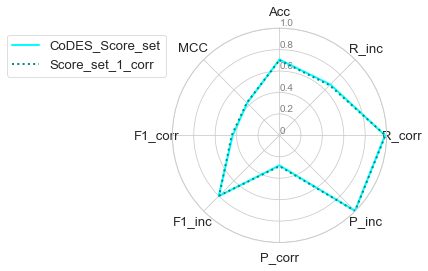

In [29]:
plot_radar(df_CODES_in_scoreset.T,"CoDES_in_Score_set",['Cyan','DarkCyan'],['solid','dotted'])

In [30]:
df_CODES_in_scoreset.round(4)

,CoDES_Score_set,Score_set_1_corr
Acc,0.7073,0.7012
R_inc,0.6712,0.6613
R_corr,0.9852,0.9889
P_inc,0.9971,0.9977
P_corr,0.2803,0.2880
F1_inc,0.8023,0.7954
F1_corr,0.4364,0.4461
MCC,0.4267,0.4310


In [31]:
df_ss.loc[['CoDES_Score_set(>1%)','CoDES_Score_set(>2.5%)' ]]

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
Target,,,,,,,,
CoDES_Score_set(>1%),0.6763,0.6213,0.9930,0.9981,0.3132,0.7658,0.4762,0.4372
CoDES_Score_set(>2.5%),0.6937,0.6216,0.9948,0.9980,0.3864,0.7661,0.5566,0.4867


In [32]:
df_CODES_in_scoreset = df_ss.loc[['CoDES_Score_set(>1%)','CoDES_Score_set(>2.5%)' ]]
# df_CODES_in_scoreset = df_ss.loc[['above_1','above_2']]
df_CODES_in_scoreset = df_CODES_in_scoreset.append(df_fig_10.loc["CoDES_Score_set"] )

In [33]:
df_CODES_in_scoreset.T.round(4)

Target,CoDES_Score_set(>1%),CoDES_Score_set(>2.5%),CoDES_Score_set
Acc,0.6763,0.6937,0.7073
R_inc,0.6213,0.6216,0.6712
R_corr,0.9930,0.9948,0.9852
P_inc,0.9981,0.9980,0.9971
P_corr,0.3132,0.3864,0.2803
F1_inc,0.7658,0.7661,0.8023
F1_corr,0.4762,0.5566,0.4364
MCC,0.4372,0.4867,0.4267


seagreen CoDES_Score_set(>1%)
royalblue CoDES_Score_set(>2.5%)
Black CoDES_Score_set


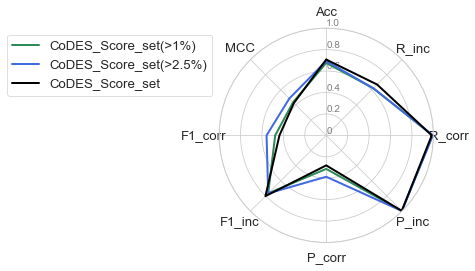

In [34]:
plot_radar(df_CODES_in_scoreset,"CoDES_in_Score_set_1_2",['seagreen','royalblue','Black'],['solid','solid','solid'])

In [35]:
df_fig_10 = df_fig_10.loc[['RF_3K-BM4/5-up','CoDES_3K-BM4/5-up','CoDES_Score_set']]
df_fig_10 = df_fig_10.append(df_ss.loc['CoDES_Score_set(>2.5%)' ])


Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up
black CoDES_Score_set
green CoDES_Score_set(>2.5%)


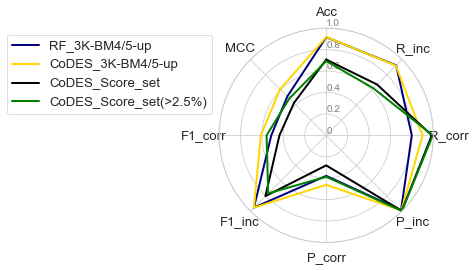

In [36]:
plot_radar(df_fig_10,"figure_10",['Navy','gold','black','green'],['solid','solid','solid','solid'])

In [37]:
df_fig_10

,Acc,R_inc,R_corr,P_inc,P_corr,F1_inc,F1_corr,MCC
RF_3K-BM4/5-up,0.916363,0.923238,0.798518,0.987428,0.377685,0.954255,0.512817,0.513344
CoDES_3K-BM4/5-up,0.918259,0.919743,0.898895,0.991649,0.461788,0.954343,0.610134,0.609263
CoDES_Score_set,0.707317,0.671200,0.985185,0.997139,0.280295,0.802331,0.436423,0.426736
CoDES_Score_set(>2.5%),0.693700,0.621600,0.994800,0.998000,0.386400,0.766100,0.556600,0.486700


Navy RF_3K-BM4/5-up
gold CoDES_3K-BM4/5-up


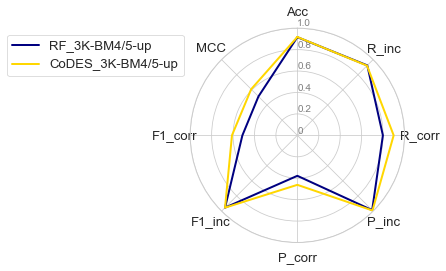

In [38]:
plot_radar(df_fig_10.loc[['RF_3K-BM4/5-up','CoDES_3K-BM4/5-up']],"figure_10_a",['Navy','gold'],['solid','solid'])

gold CoDES_3K-BM4/5-up
black CoDES_Score_set
green CoDES_Score_set(>2.5%)


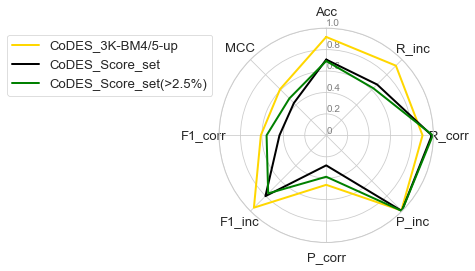

In [39]:
plot_radar(df_fig_10.loc[['CoDES_3K-BM4/5-up','CoDES_Score_set','CoDES_Score_set(>2.5%)']],
           "figure_10_b",
           ['gold','black','green'],
           ['solid','solid','solid'])

In [40]:
df = pd.read_csv("../data/table_Score_set_all_tmp.csv")

In [41]:
df

,T,CoDES,GraphRank,IScore,CAPRI_best
0,T29,10/7**,4,4,9/5**
1,T32,1/1**,4/1**,4/1**,2
2,T35,0,0,0,1
3,T37,10/1***/6**,2/1**,4/2**,6/1***
4,T40,7/3***/3**,4/3**,4/1***,10/10***
5,T41,5/2**,8,10/2**,10/2***
6,T46,2,3,4,4
7,T47,9/3***/6**,8/5***/3**,10/6***/4**,10/10***
8,T50,4/2**,0,4/3**,7/6**
9,T53,2/1**,5/1**,5/1**,8/3**


In [42]:
def decompress(x):
    total = x.split("/")[0]
    all_others = x.split("/")[1:]
    num = 0 
    num_b = 0 
    for x in all_others:
#         print (x[1:])
        if x[1:] == "***"   : 
            num = x[0]
        elif x[1:] == "**"  :
            num_b = x[0]
        else:
            break
    return total, num ,num_b

def get_all(x):
    total = x.split("/")[0]
    return int(total)

def get_high(x):
    all_others = x.split("/")[1:]
    num = 0 
    for x in all_others:
#         print (x[1:])
        if x[1:] == "***"   : 
            num = x[0]
    return int(num) 

def get_med(x):
    all_others = x.split("/")[1:]
    num = 0 
    for x in all_others:
#         print (x[1:])
        if x[1:] == "**"   : 
            num = x[0]
    return int(num) 

In [43]:
df["CoDES"].apply(decompress)

0    (10, 0, 7)
1     (1, 0, 1)
2     (0, 0, 0)
3    (10, 1, 6)
4     (7, 3, 3)
5     (5, 0, 2)
6     (2, 0, 0)
7     (9, 3, 6)
8     (4, 0, 2)
9     (2, 0, 1)
Name: CoDES, dtype: object

In [44]:
df["CoDES"].apply(get_all)

0    10
1     1
2     0
3    10
4     7
5     5
6     2
7     9
8     4
9     2
Name: CoDES, dtype: int64

In [45]:
firts_data = pd.DataFrame()

In [46]:
#  firts_data["CoDES"] =  df["CoDES"].apply(get_all)
for m in ['CoDES','GraphRank','IScore','CAPRI_best']: 
#     print (m)
    firts_data[m] =  df[m].apply(get_all)

In [47]:
firts_data["T"] = df["T"]

In [48]:
firts_data.set_index("T", inplace=True)

In [49]:
def plot_radar(dataframe,title,list_of_colors,linestyle_list):
    '''Funtion to plot radar , using a dataframe , title , list of colors you need, and linestyle,
    be careful with the order of the datframe , and also the scale of the line
    '''
    # ------- PART 1: Create background
    categories = dataframe.T.index.to_list()
      # number of variable
      # categories=list(df)[1:]
      #categories = metrics_only.T["group"].values.tolist() ### original line 

    N = len(categories)

      # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

      # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

      # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

      # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

      # Draw ylabels
    ax.set_rlabel_position(0)

    plt.yticks(range(0,12,2), ["0","2","4","6","8","10"], color="grey", size=10)
    plt.ylim(0,10)
      # plt.yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0], ["0.4","0.5","0.6","0.7","0.8","0.9","1.0"], color="grey", size=10)
      # plt.ylim(0.4,1)


      #------ PART 2: Add plots

      # Plot each individual = each line of the data
      # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

      #for i,row in zip(['r','g','b'],["SVM","Perceptron","RandomForest"]):
    for i,row, style in zip(list_of_colors,dataframe.index.to_list(),linestyle_list):
        print (i,row)
        values = dataframe.loc[row].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, i,linewidth=2, linestyle=style, label=row)
          # ax.fill(angles, values,i , alpha=0.1)



      # Add legend
#     plt.legend()
#     plt.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
    plt.legend( bbox_to_anchor=(0, 1))

    plt.tight_layout()
    #   plt.show()
    #   plt.savefig(f"figures/{title}.png",dpi=300,transparent=True,format="png")
    plt.savefig(f"figures/{title}.svg",dpi=300,transparent=True,format="svg")


Gold CoDES
Salmon GraphRank
coral IScore


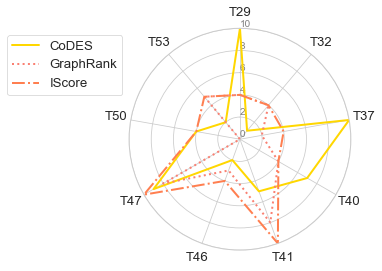

In [50]:
# plot_radar(firts_data.T, )
plot_radar(firts_data.drop("T35").T,
           "figure_Score_b",
           ['Gold','Salmon','coral'],
           ['solid','dotted','dashdot'])

<AxesSubplot:xlabel='T'>

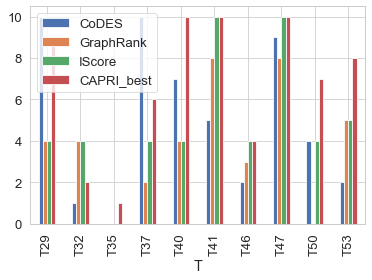

In [51]:
firts_data.plot(kind="bar")

In [52]:
for n in range(0,12,2):
    print (n)

0
2
4
6
8
10
